# Lập trình cho Khoa học dữ liệu: Đồ án cuối kì
## Nhóm 8: Thông tin sinh viên
- #### Trello: https://trello.com/b/Tb6Sjg8O
- #### Link thùng chứa: https://github.com/luthevy/LTKHDL_Final

| MSSV     | Họ tên            | GitHub                         |    Email         
|--------------|---------------------|------------------------------ |--------------------------------------------------|
| 19127009 | Lữ Thế Vỹ | [luthevy](https://github.com/luthevy) | 19127009@student.hcmus.edu.vn
| 19127416 | Mạc Văn Hưng     | [machung2001](https://github.com/machung2001)        |19127416@student.hcmus.edu.vn


# Mục lục
- #### [Lời nói đầu](#Lời-nói-đầu)
    - [Giới thiệu](#Giới-thiệu)
    - [Nguồn tài liệu](#Nguồn-tài-liệu)
- #### [Bước chuẩn bị](#Bước-chuẩn-bị)
    - [Nhận diện môi trường code](#Môi-trường-code)
    - [Import thư viện](#Import-các-thư-viện-cần-thiết)
- #### [Khám phá dữ liệu](#Thu-thập-dữ-liệu)
    - [Đọc dữ liệu](#Đọc-dữ-liệu-từ-file-csv-vào-dataframe)
    - [Thông tin cơ bản](#Thông-tin-cơ-bản)
        - [Số dòng, số cột của tập dữ liệu](#Dữ-liệu-gồm-có-bao-nhiêu-dòng-và-bao-nhiêu-cột?)
        - [Ý nghĩa từng cột](#Mỗi-cột-có-ý-nghĩa-gì?)
        - [Kiểu dữ liệu từng cột](#Mỗi-cột-hiện-đang-có-kiểu-dữ-liệu-gì?)
    - [Tiền xử lý](#Tiền-xử-lý)
        - [Cột cần loại bỏ](#Cột-cần-loại-bỏ)
        - [Cột bất thường](#Cột-bất-thường)
        - [Dòng bất thường](#Dòng-bất-thường)
        - [Dòng bị lặp](#Dòng-bị-lặp)
- #### [Phân bố dữ liệu](#Phân-bố-dữ-liệu)
    - [Kiểu numerical](#Kiểu-numerical)
    - [Kiểu categorical](#Kiểu-categorical)
    - [Điền missing values](#Điền-missing-values)
- #### [Đặt câu hỏi](#Đặt-câu-hỏi)


_____________________________________________

## Lời nói đầu

### Giới thiệu

Theo Tổ chức Sức khoẻ Thế giới (WHO), đột quỵ là nguyên nhân đứng thứ hai có thể dẫn đến cái chết bất ngờ và tình trạng này xảy ra trên toàn cầu. Tập dữ liệu này được sử dụng để dự đoán khả năng mắc bệnh đột quỵ dựa trên những số liệu sức khoẻ đầu vào như giới tính, tuổi, các loại bệnh khác, và tình trạng hút thuốc. Mỗi dòng trong tập dữ liệu cung cấp thông tin sức khoẻ liên quan của các bệnh nhân. 


### Nguồn tài liệu

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


______

## Bước chuẩn bị

___

### Môi trường code

In [1]:
import sys
sys.executable

'F:\\Anaconda\\python.exe'

### Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd

# Thư viện đồ hoạ
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import plotly.express as pxe
import seaborn as sn


---

## Khám phá dữ liệu
___

### Đọc dữ liệu từ file csv vào dataframe

- Đọc 5 dòng đầu tiên

In [3]:
hcs_df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
hcs_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Thông tin cơ bản

#### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [51]:
num_rows = hcs_df.shape[0]
num_cols = hcs_df.shape[1]

pd.DataFrame([num_cols,num_rows], index=['Số cột','Số dòng'])


,0
Số cột,11
Số dòng,5110


#### Mỗi cột có ý nghĩa gì?

In [5]:
with open('data/description.txt', 'r') as f:
    print(f.read())

1) id:                 unique identifier
2) gender:             "Male", "Female" or "Other"
3) age:                age of the patient
4) hypertension:       0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease:      0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married:       "No" or "Yes"
7) work_type:          "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type:     "Rural" or "Urban"
9) avg_glucose_level:  average glucose level in blood
10) bmi:               body mass index
11) smoking_status:    "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke.            1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


Theo mô tả trên kaggle về các cột trong tập `healthcare-dataset-stroke-data.csv`
- **id**: mã id
- **gender**: giới tính ("Male", Female" và "Other")
- **age**: tuổi tác
- **hypertension**: bị huyết áp cao (0 là không, 1 là có)
- **heart_disease**: bị bệnh tim (0 là không, 1 là có)
- **ever_married**: tình trạng kết hôn ("No" và "Yes")
- **work_type**: loại nghề nghiệp ("children", "Govt_jov", "Never_worked", "Private" và "Self-employed")
- **Residence_type**: loại cư dân ("Rural" hoặc "Urban")
- **avg_glucose_level**: lượng đường trung bình trong máu
- **bmi**: chỉ số khối cơ thể
- **smoking_status**: tình trạng hút thuốc ("formerly smoked", "never smoked", "smokes" và "Unknown")
- **stroke**: bị đột quỵ (0 là không, 1 là có)

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [6]:
hcs_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

_______

### Tiền xử lý

#### Cột cần loại bỏ
Trong tập dữ liệu `healthcare-dataset-stroke-data.csv`, có tất cả 12 cột dữ liệu chứa các thông tin liên quan đến sức khoẻ. Duy chỉ có một cột và là cột đầu tiên `id` chứa thông tin mã số phân biệt của mỗi đối tượng tham gia khảo sát. Cột `id` nhìn chung không có giá trị hữu ích để dùng cho việc đặt câu hỏi sau này (do giá trị của nó không liên quan đến chủ đề sức khoẻ), nên ta sẽ loại bỏ nó.

In [7]:
hcs_df.drop(columns=['id'], inplace=True)
hcs_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Cột bất thường
Dựa theo thông tin về kiểu dữ liệu của từng cột, đối chiếu với dữ liệu trên bảng, ta thấy dữ liệu từng cột không có gì khác thường.


In [8]:
hcs_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
hcs_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Dòng bất thường
Mỗi dòng liệt kê các thông tin sức khoẻ của người tham gia khảo sát, ứng với từng cột. Các dòng dữ liệu nhìn chung không có gì bất thường, trừ các dòng bị thiếu hụt dữ liệu (ở cột `bmi`). Có 201 ô dữ liệu thiếu ở cột `bmi`, tương ứng 201 dòng bị thiếu dữ liệu. Việc điền dữ liệu thiếu sẽ được thực hiện ở sau bước Phân tích phân bố dữ liệu.

In [10]:
hcs_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Dòng bị lặp
Dữ liệu từng dòng của dataset `healthcare-dataset-stroke-data.csv` có bị trùng lặp nhau không?

In [11]:
hcs_total_dupRows = np.sum(hcs_df.duplicated())

pd.DataFrame({'Dataset': ['Healthcare'],
             'Duplicate count': [hcs_total_dupRows]})


,Dataset,Duplicate count
0,Healthcare,0


___

## Phân bố dữ liệu
________

### Kiểu numerical

Hiện có 6 cột thuộc dạng numeric: "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke". Nhưng 3 cột "hypertension", "heart_disease", "stroke" do mã được đánh dưới dạng số nên 3 cột này sẽ là dạng categorical. Vì vậy, chỉ có 3 cột numeric là "age", "avg_glucose_level", "bmi". 

In [12]:
def missing_ratio(col):
    return col.isna().mean() * 100

In [13]:
num_col_profiles_df = hcs_df[["age", "avg_glucose_level", "bmi"]]
num_col_profiles_df = num_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
num_col_profiles_df

,age,avg_glucose_level,bmi
missing_ratio,0.00,0.00,3.933464
min,0.08,55.12,10.300000
max,82.00,271.74,97.600000


### Kiểu categorical

Ban đầu sẽ có 5 cột thuộc dạng categorical: "gender", "ever_married", "work_type", "Residence_type", "smoking_status".
Bởi vì lý do ở trên nên sẽ có thêm 3 cột: "hypertension", "heart_disease", "stroke". Vì vậy, tổng cộng có 8 cột thuộc dạng categorical: "id", "gender", "hypertension", "heart_disease","work_type", "Residence_type", "smoking_status", "stroke".

In [14]:
def unique_non_null(s):
    return s.dropna().unique()

In [15]:
cate_col_profiles_df = hcs_df[["gender", "hypertension", "heart_disease","work_type", 
                               "Residence_type", "smoking_status", "stroke"]]
cate_col_profiles_df = cate_col_profiles_df.agg([missing_ratio, unique_non_null, pd.Series.nunique])
cate_col_profiles_df = cate_col_profiles_df.rename(index={'unique_non_null': 'diff_vals', 'nunique': 'num_diff_vals'})
cate_col_profiles_df

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diff_vals,"[Male, Female, Other]","[0, 1]","[1, 0]","[Private, Self-employed, Govt_job, children, N...","[Urban, Rural]","[formerly smoked, never smoked, smokes, Unknown]","[1, 0]"
num_diff_vals,3,2,2,5,2,4,2


#### Điền missing values

Cột `bmi` chứa có chứa giá trị `NaN` nên chúng ta sẽ dùng kĩ thuật điền thay thế `NaN` bằng giá trị `mean` của cột 

In [16]:
hcs_df[hcs_df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Cột `smoking_status` có chứa các giá trị `Unknown`, tức là không xác định rõ trạng thái hút thuốc (đang hút hay đã bỏ, hay chưa từng hút?) của một bệnh nhân, ta cũng sẽ thực hiện việc thay thế các chuỗi `Unknown` này bằng một chuỗi có lượt xuất hiện nhiều nhất trong cột (`most frequent occurance`)

In [17]:
hcs_df[hcs_df['smoking_status'] == 'Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5098,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


- Với cột `bmi`, thay thế `NaN` bằng giá trị `mean`

In [18]:
hcs_df['bmi'] = hcs_df['bmi'].fillna(hcs_df['bmi'].mean())

- Kiểm tra kết quả: đã không còn giá trị

In [52]:
hcs_df[hcs_df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


- Với cột `smoking_status`, do có kiểu dữ liệu không ở dạng số nên ta sẽ thay thế giá trị `Unknown` bằng giá trị có lượt xuất hiện nhiều nhất cột

**Bước 1**: Xác định giá trị xuất hiện nhiều nhất trong cột

In [20]:
smoking_status_most_freq = hcs_df['smoking_status'].value_counts().idxmax()

**Bước 2:** Thay thế giá trị `Unknown`

In [21]:
hcs_df['smoking_status'].replace({'Unknown': smoking_status_most_freq}, inplace=True)

- Kiểm tra kết quả: đã không còn giá trị `Unknown`

In [53]:
hcs_df[hcs_df['smoking_status'] == 'Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


___

## Đặt câu hỏi
___

#### Trong những người trên 50 tuổi sống có tiền sử đột quỵ, tỉ lệ người có mắc bệnh về tim mạch chiếm bao nhiêu phần trăm?

- Thông qua câu hỏi này, ta có thể nhận biết được mức độ nghiêm trọng của bệnh tim đóng góp vào phần trăm khả năng xảy ra đột quỵ ở người lớn tuổi, cũng như biết trước được cách phòng tránh, để chăm sóc sức khoẻ tốt hơn.

**Bước 1:** Đối tượng lấy mẫu sẽ là cư dân ở thành thị `Urban` và nông thôn `Rural`

In [23]:
stroke_urban = hcs_df.loc[(hcs_df['age'] > 50.0) & (hcs_df['Residence_type'] == 'Urban') & (hcs_df['stroke'] == 1)]
stroke_rural = hcs_df.loc[(hcs_df['age'] > 50.0) & (hcs_df['Residence_type'] == 'Rural') & (hcs_df['stroke'] == 1)]

**Bước 2:** Đếm số lượng mẫu của `Urban` và `Rural` thoả mãn điều kiện

In [24]:
num_stroke_urban = stroke_urban.count(axis='rows')
display(pd.DataFrame(num_stroke_urban, columns = ['Dòng']))

,Dòng
gender,124
age,124
hypertension,124
heart_disease,124
ever_married,124
work_type,124
Residence_type,124
avg_glucose_level,124
bmi,124
smoking_status,124


- Nhận xét: Số dòng tương ứng với số lượng mẫu thoả mãn điều kiện truy vấn. Có tổng cộng 124 mẫu thoả điều kiện

In [25]:
num_stroke_rural = stroke_rural.count(axis='rows')
display(pd.DataFrame(num_stroke_rural, columns = ['Dòng']))

,Dòng
gender,102
age,102
hypertension,102
heart_disease,102
ever_married,102
work_type,102
Residence_type,102
avg_glucose_level,102
bmi,102
smoking_status,102


- Nhận xét: Số dòng tương ứng với số lượng mẫu thoả mãn điều kiện truy vấn. Có tổng cộng 102 mẫu thoả điều kiện

**Bước 3:** Lọc ra các bệnh nhân có tiền sử bệnh tim (`heart_disease` = 1)

In [26]:
with_heart_disease_urban = stroke_urban.loc[(stroke_urban['heart_disease'] == 1)]
with_heart_disease_rural = stroke_rural.loc[(stroke_rural['heart_disease'] == 1)]

**Bước 4:** Đếm số lượng mẫu thoả mãn điều kiện

In [ ]:
num_heart_disease_urban = with_heart_disease_urban.count(axis='rows')
num_heart_disease_rural = with_heart_disease_rural.count(axis='rows')

In [27]:
pd.DataFrame(num_heart_disease_urban, columns = ['Số dòng'])

,Số dòng
gender,27
age,27
hypertension,27
heart_disease,27
ever_married,27
work_type,27
Residence_type,27
avg_glucose_level,27
bmi,27
smoking_status,27


- Nhận xét: Số dòng tương ứng với số lượng mẫu thoả mãn điều kiện truy vấn. Có tổng cộng 27 mẫu thoả điều kiện

In [28]:
pd.DataFrame(num_heart_disease_rural, columns = ['Số dòng'])

,Số dòng
gender,20
age,20
hypertension,20
heart_disease,20
ever_married,20
work_type,20
Residence_type,20
avg_glucose_level,20
bmi,20
smoking_status,20


- Nhận xét: Số dòng tương ứng với số lượng mẫu thoả mãn điều kiện truy vấn. Có tổng cộng 20 mẫu thoả điều kiện

**Bước 5:** Tính tỉ lệ bằng cách lấy số lượng mẫu (bệnh nhân đột quỵ có tiền sử bệnh tim) chia cho tổng số lượng bệnh nhân đột quỵ, áp dụng cho cả thành thị `Urban` và nông thôn `Rural`

In [ ]:
percent_heart_disease_urban = (num_heart_disease_urban[0] / num_stroke_urban[0]) * 100
percent_heart_disease_rural = (num_heart_disease_rural[0] / num_stroke_rural[0]) * 100

**Bước6:** Trực quan hoá kết quả bằng biểu đồ tròn 

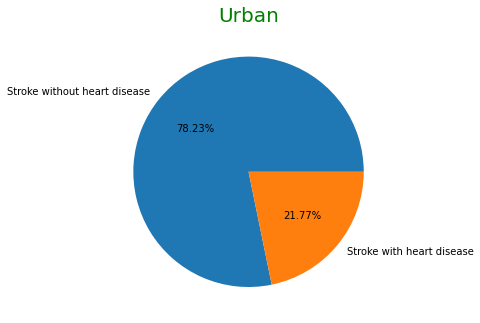

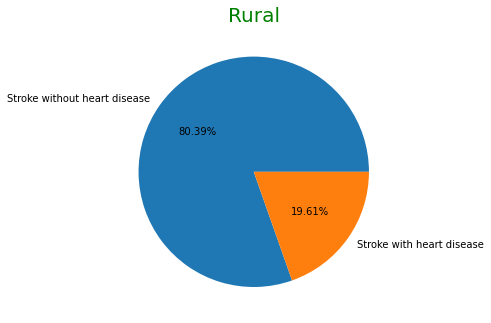

In [29]:
fig = plt.figure(0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
names = ['Stroke without heart disease','Stroke with heart disease']
ax.pie([100 - percent_heart_disease_urban,percent_heart_disease_urban], labels = names,autopct='%1.2f%%')
plt.title(label='Urban',
          fontsize=20,
          color='green')
plt.show()

fig = plt.figure(1)
ax = fig.add_axes([0,0,1,1])
ax.pie([100 - percent_heart_disease_rural,percent_heart_disease_rural], labels = names,autopct='%1.2f%%')
plt.title(label='Rural',
          fontsize=20,
          color='green')
plt.show()

**Nhận xét**
- Thông qua hai biểu đồ tròn kết quả, ta thấy được 

_____

#### Đối với những người có lối sống không lành mạnh (hút thuốc, ăn thức ăn nhiều dầu mỡ, uống nước ngọt) thì chắc chắn họ luôn có 
#### khả năng bị đột quỵ. Tuy nhiên, ta tự hỏi: liệu có trường hợp nào sống lành mạnh mà vẫn có khả năng bị đột quỵ không? Và các 
#### trường hợp này chiếm tỉ lệ là bao nhiêu?

In [34]:
stroke_active = hcs_df.loc[(hcs_df['stroke'] == 1)]
num_stroke_active = stroke_active.count(axis='rows')
pd.DataFrame(num_stroke_active, columns = ['Số dòng'])


,Số dòng
gender,249
age,249
hypertension,249
heart_disease,249
ever_married,249
work_type,249
Residence_type,249
avg_glucose_level,249
bmi,249
smoking_status,249


In [35]:
healthy_but_stroke = stroke_active.loc[(stroke_active['avg_glucose_level'] < 140.0) & 
                                       (stroke_active['bmi'] < 30.0) & 
                                       (stroke_active['smoking_status'] == 'never smoked')]
num_healthy_but_stroke = healthy_but_stroke.count(axis='rows')
pd.DataFrame(num_healthy_but_stroke, columns = ['Số dòng'])

,Số dòng
gender,62
age,62
hypertension,62
heart_disease,62
ever_married,62
work_type,62
Residence_type,62
avg_glucose_level,62
bmi,62
smoking_status,62


,Kết quả
%,24.9


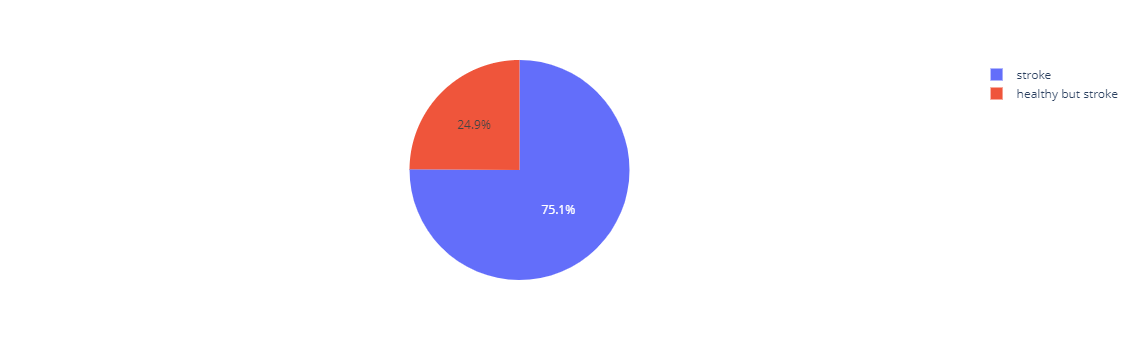

In [36]:
percent_healthy_but_stroke = (num_healthy_but_stroke[0] / num_stroke_active[0]) * 100
display(pd.DataFrame(data = [np.round(percent_healthy_but_stroke,1)],
                   index=['%'],
                   columns=['Kết quả']))

 
fig = pxe.pie(values=[(100 - percent_healthy_but_stroke), percent_healthy_but_stroke], names=['stroke', 'healthy but stroke'])
fig.show()

#### Nhận xét:

____

### Giữa những người đã từng hoặc đang hút thuốc và những người chưa hút thuốc bao giờ thì tỷ lệ bị mắc bệnh chênh lệch bao nhiêu?

- Để lấy thông tin người này có bị mắc bệnh không, ta xét 3 cột hypertension, heart_disease, stroke, nếu 1 trong 3 cột nếu có bị (tương đương số 1) thì ta cho người này có bệnh (True).
- Từ đó ta tạo thêm cột has_disease để lưu boolean (True, False) rằng người này có bệnh hay không

In [37]:
copy_hcs_df = hcs_df.copy()
has_disease = (hcs_df['hypertension'] == 1) | (hcs_df['heart_disease'] == 1) | (hcs_df['stroke'] == 1)
copy_hcs_df['has_disease'] = has_disease

copy_hcs_df['has_disease']

0        True
1        True
2        True
3        True
4        True
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: has_disease, Length: 5110, dtype: bool

- Ta group 2 cột smoking_status và has_disease vừa được tạo ở bước trên để tính phân bố dựa theo smoking_status
- Sau đó tính tỷ lệ mắc bệnh bằng cách chia tổng của từng loại smoking_status

In [38]:
disease_smoke_df = copy_hcs_df.groupby(['smoking_status','has_disease']).size()
disease_smoke_df = disease_smoke_df.unstack(0)
disease_smoke_df = disease_smoke_df / disease_smoke_df.sum()
disease_smoke_df

smoking_status,formerly smoked,never smoked,smokes
has_disease,,,
False,0.752542,0.860594,0.795944
True,0.247458,0.139406,0.204056


Theo số liệu được tính toán như trên, ta thấy tỷ lệ mắc bệnh (hypertension hoặc heart disease hoặc stroke) của những người không hút thuốc (never smoked) thấp hơn so với những người đã từng (formerly smoked) hoặc đang hút thuốc (smokes). Ta còn thấy tỷ lệ không mắc bệnh của never smoked lại cao hơn 2 loại kia. Từ những điều trên cho thấy hành vi hút thuốc có tác động rất lớn đến sức khoẻ của con người và tỷ lệ mắc bệnh cao lên.

___

### Con người càng già thì càng dễ bị mắc bệnh không?

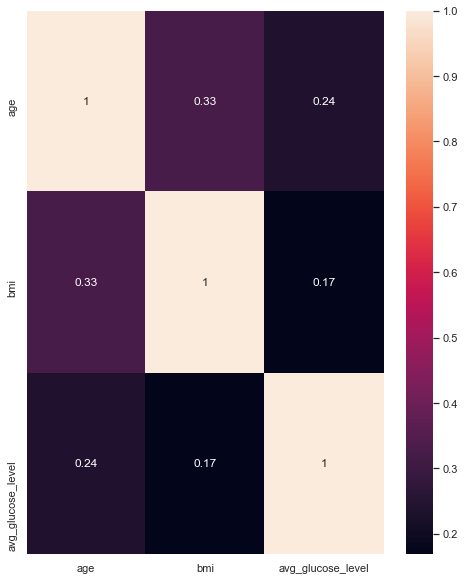

In [44]:
df = pd.DataFrame(hcs_df,columns=['age','bmi','avg_glucose_level'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
sn.set(rc={'figure.figsize':(8,10)})
plt.show()